In [197]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import math as m
from matplotlib import pyplot as plt 

In [198]:
#math constants 
pi = 3.14159265359 
g = 9.81

In [199]:
#wheel velocity 

rpm = 2000
W = (rpm/60) * 2 * pi
r = 0.09
v0 = W * r * 0.55 
print(v0)

10.367255756847


In [200]:
#tennisbal constants

k = 0.05

C = 0.5
rho = 1.292
A = 0.003316625

cor = 0.66666
cof = 0.72

In [201]:
#launcher constants

theta = 20*pi/180
s0 = 1

In [202]:
#velocity

v0x = v0 * m.cos(theta)
vx = v0x
v0y = v0 * m.sin(theta)
print(v0x,v0y)

9.742033732509272 3.5458102998508987


In [203]:
#time 

t = 0
tf = 3.0*v0y/g
dt = tf/2000

In [204]:
A = g/k

B = v0y + A

x = v0x/-k * m.exp(t*-k)
z = B/-k * m.exp(t*-k)-A*t

cx = -v0x/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [205]:
i = 0 
x = []
z = []
y= []


In [206]:

#### first motion
while B/-k * m.exp(t*-k)-A*t-(cy-0.2) >= 0: 
        t = t + dt
        x.append(v0x/-k * m.exp(t*-k)+cx)
        z.append(B/-k * m.exp(t*-k)-A*t-(cy-0.2)) 
        #print(x[i],y[i])
        i = i + 1

In [207]:
v0x2 = v0x * cof
v0y2 = -(v0y-g*t) * cor

xref = x[i-1]

t = 0 
tf = 2.0*v0/g
dt = tf/2000

A = g/k

B = v0y2 + A

cx = -v0x2/-k * m.exp(0*-k)
cy = B/-k * m.exp(0*-k)-A*0


In [208]:
#### second motion

while B/-k * m.exp(t*-k)-A*t-(cy) >= 0:
        t = t + dt 
        x.append(v0x2 /-k * m.exp(t*-k)+cx + xref)
        z.append(B/-k * m.exp(t*-k)-A*t-cy) 
        #print(x[i],y[i])
        i = i + 1 

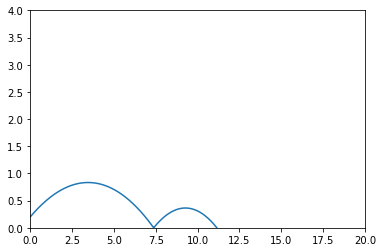

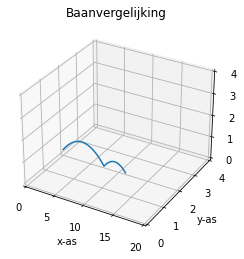

In [209]:
y = []


k = 0
while k <= len(x) - 1:
    y.append(2)
    k = k+1

#print(y)
#print(x)
plt.subplot(1,1,1)
plt.plot(x,z)
plt.xlim(0, 20)
plt.ylim(0, 4)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y ,z)

ax.set_zlim(0,4)
plt.xlim(0, 20)
plt.ylim(0, 4)
plt.title("Baanvergelijking")
plt.ylabel("y-as")
plt.xlabel("x-as")
plt.show()

In [210]:
df = pd.DataFrame(list(zip(x,y)),
        columns = ['xdata','ydata'])
print(df)

          xdata  ydata
0      0.005282      2
1      0.010563      2
2      0.015845      2
3      0.021126      2
4      0.026408      2
...         ...    ...
1935  11.122482      2
1936  11.129696      2
1937  11.136911      2
1938  11.144125      2
1939  11.151338      2

[1940 rows x 2 columns]
